In [2]:
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk

In [9]:
#searching for light curves
# we want to find the light curve, so we need to look up what its KIC ID is. 
search_result = lk.search_lightcurve('KIC 6922244', author='Kepler') #(identify the target, author= the specific mission that will be returned.)
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 02,2009,Kepler,60,kplr006922244,0.0
1,Kepler Quarter 02,2009,Kepler,60,kplr006922244,0.0
2,Kepler Quarter 02,2009,Kepler,60,kplr006922244,0.0
3,Kepler Quarter 03,2009,Kepler,60,kplr006922244,0.0
4,Kepler Quarter 03,2009,Kepler,60,kplr006922244,0.0
5,Kepler Quarter 03,2009,Kepler,60,kplr006922244,0.0
6,Kepler Quarter 00,2009,Kepler,1800,kplr006922244,0.0
7,Kepler Quarter 01,2009,Kepler,1800,kplr006922244,0.0
8,Kepler Quarter 02,2009,Kepler,1800,kplr006922244,0.0


C:\Users\winx2\anaconda3\Lib\site-packages\lightkurve\search.py:420: LightkurveWarning: Warning: 49 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


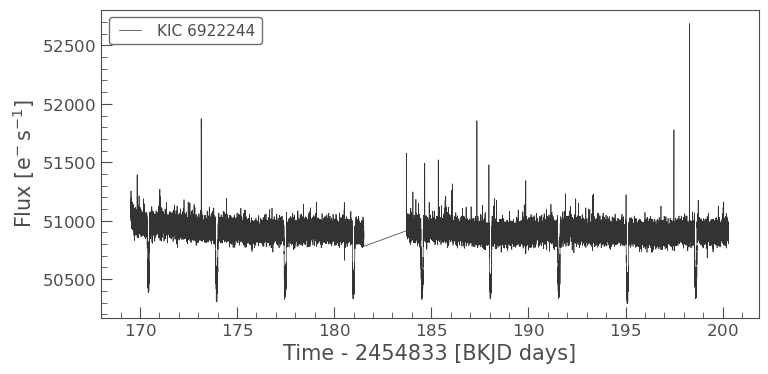

In [4]:
lc = search_result.download()  # grabs the first available lightcurve file

# Plot the first light curve
lc.plot()
plt.show()

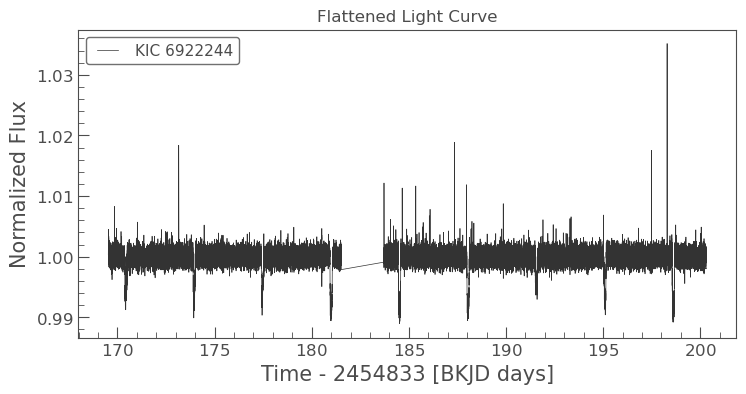

In [5]:
lc_flat = lc.flatten(window_length=401)  # remove long-term trends
lc_flat.plot()
plt.title("Flattened Light Curve")
plt.show()

In [6]:
#identify the transit period using BLS
from astropy.timeseries import BoxLeastSquares

# Extract time and flux arrays from the flattened light curve
time = lc_flat.time.value #time in days
flux = lc_flat.flux.value 

# Remove NaNs
mask = ~np.isnan(flux)
time = time[mask]
flux = flux[mask]

# Box Least Squares search
# BLS looks for periodic “box-shaped” dips in the light curve like transits
bls = BoxLeastSquares(time, flux)
periods = np.linspace(1, 30, 10000)  # search periods 1-30 days

# Run BLS to compute the “power” of transit-like signals for a range of periods
bls_results = bls.autopower(0.02)  #0.02 is the expected transit duration as a fraction of the period

best_period = bls_results.period[np.argmax(bls_results.power)] # Identify the period with the highest BLS power (most likely transit period)
print(f"Best-fit period: {best_period:.5f} days")

Best-fit period: 3.52632 days


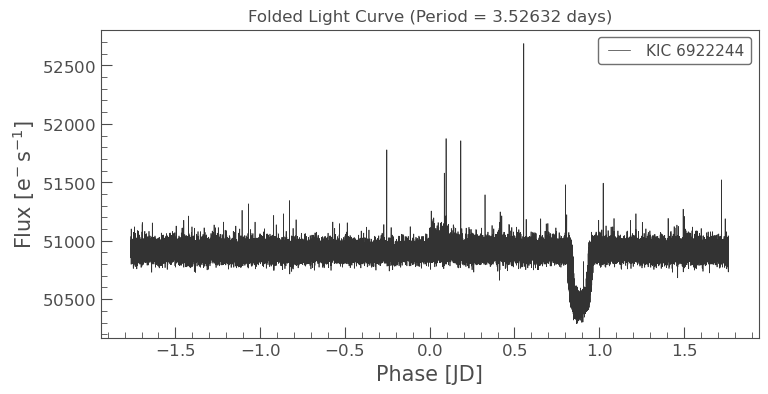

In [7]:
# Fold the light curve. This aligns all the transits on top of each other. 
lc_fold = lc.fold(period=best_period)
lc_fold.plot()
plt.title(f"Folded Light Curve (Period = 3.52632 days)")
plt.show()

In [ ]:
#phase is the time in "julian Date"- this a measurement of time between two events. 
# this graph is the best one yet. Probably because of the amount of quarters. 